In [1]:
import pandas as pd
#pandas is for data manipulation
import numpy as np
#numpy is used for numerical computing, working with arrays, and performing mathematical operations efficiently.
import seaborn as sns
#seaborn provides high-level functions for creating attractive and informative visualizations.
import matplotlib.pyplot as plt
#matplotlib is a fundamental library for creating static, animated, and interactive visualizations in Python.


In [2]:
df=pd.read_csv("combined_sarawak_latest.csv")

In [3]:
df.head

<bound method NDFrame.head of                date  tavg  tmin  tmax   prcp  wspd    pres  tsun     city
0     1/1/2000 0:00  25.5  23.7  29.9  903.0   NaN  1009.6   NaN  kuching
1     1/2/2000 0:00  26.0  23.4  30.5  574.0   NaN  1009.3   NaN  kuching
2     1/3/2000 0:00  26.4  23.5  31.6  265.0   NaN  1009.4   NaN  kuching
3     1/4/2000 0:00  26.1  23.2  32.3  372.0   NaN  1009.1   NaN  kuching
4     1/5/2000 0:00  27.1  23.6  33.3  216.0   NaN  1009.3   NaN  kuching
..              ...   ...   ...   ...    ...   ...     ...   ...      ...
895   1/8/2024 0:00  26.4  23.5  31.5    NaN   5.4     NaN   NaN     sibu
896   1/9/2024 0:00  27.6  24.0  32.6    NaN   5.6     NaN   NaN     sibu
897  1/10/2024 0:00  26.9  23.8  32.0  149.5   5.1  1009.4   NaN     sibu
898  1/11/2024 0:00  26.6  23.9  31.6  282.3   5.2  1008.5   NaN     sibu
899  1/12/2024 0:00  27.0  23.9  31.9    NaN   5.2     NaN   NaN     sibu

[900 rows x 9 columns]>

In [4]:
df.info

<bound method DataFrame.info of                date  tavg  tmin  tmax   prcp  wspd    pres  tsun     city
0     1/1/2000 0:00  25.5  23.7  29.9  903.0   NaN  1009.6   NaN  kuching
1     1/2/2000 0:00  26.0  23.4  30.5  574.0   NaN  1009.3   NaN  kuching
2     1/3/2000 0:00  26.4  23.5  31.6  265.0   NaN  1009.4   NaN  kuching
3     1/4/2000 0:00  26.1  23.2  32.3  372.0   NaN  1009.1   NaN  kuching
4     1/5/2000 0:00  27.1  23.6  33.3  216.0   NaN  1009.3   NaN  kuching
..              ...   ...   ...   ...    ...   ...     ...   ...      ...
895   1/8/2024 0:00  26.4  23.5  31.5    NaN   5.4     NaN   NaN     sibu
896   1/9/2024 0:00  27.6  24.0  32.6    NaN   5.6     NaN   NaN     sibu
897  1/10/2024 0:00  26.9  23.8  32.0  149.5   5.1  1009.4   NaN     sibu
898  1/11/2024 0:00  26.6  23.9  31.6  282.3   5.2  1008.5   NaN     sibu
899  1/12/2024 0:00  27.0  23.9  31.9    NaN   5.2     NaN   NaN     sibu

[900 rows x 9 columns]>

In [5]:
df.describe()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
count,900.000000,867.000000,858.000000,868.000000,329.000000,755.000000,85.000000
mean,26.853667,23.704268,31.764103,294.671544,6.206991,1009.757616,9875.294118
std,0.640267,0.492946,0.961738,167.387311,1.180887,0.823498,2019.588942
min,25.000000,22.100000,28.300000,8.000000,3.600000,1007.200000,5220.000000
25%,26.400000,23.300000,31.100000,189.000000,5.300000,1009.200000,8400.000000
50%,26.850000,23.700000,31.800000,263.900000,5.900000,1009.700000,9840.000000
75%,27.300000,24.000000,32.500000,363.000000,7.200000,1010.300000,11280.000000
max,28.800000,25.600000,34.500000,1400.400000,12.300000,1012.500000,14940.000000


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

date      0
tavg      0
tmin     33
tmax     42
prcp     32
wspd    571
pres    145
tsun    815
city      0
dtype: int64


In [20]:
#3. FIll in with median values (numerical data only)


df= df.assign(
   tmin=df['tmin'].fillna(df['tmin'].median()),
   tmax=df['tmax'].fillna(df['tmax'].median()),
    prcp=df['prcp'].fillna(df['prcp'].median()),
    pres=df['pres'].fillna(df['pres'].median()),
)

# Save the cleaned dataset to a new CSV file
filename = 'cleaned_weather_data.csv'
df.to_csv(filename, index=False)

print(f"✅ Cleaned dataset saved successfully as '{filename}'")

✅ Cleaned dataset saved successfully as 'cleaned_weather_data.csv'


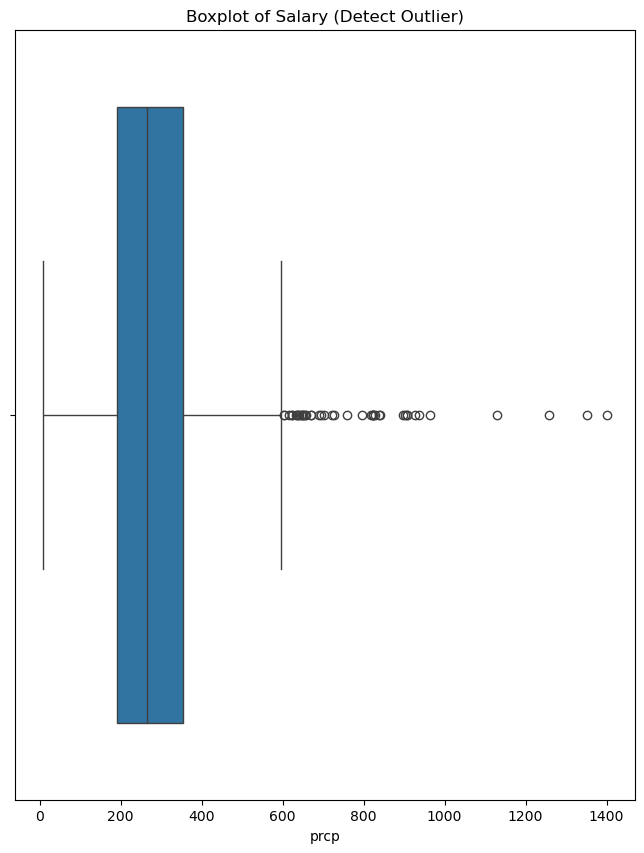

In [8]:
# Boxplot
plt.figure(figsize=(8,10))
sns.boxplot(x=df['prcp'])
plt.title("Boxplot of Salary (Detect Outlier)")
plt.show()

In [9]:
# 4. Verify or checking
df.isnull().sum()

date      0
tavg      0
tmin      0
tmax      0
prcp      0
wspd    571
pres      0
tsun    815
city      0
dtype: int64

In [14]:
# Encode 'Product'
df['city'], city_labels = pd.factorize(df['city'])

# Print the label mappings
print("city labels:", dict(enumerate(city_labels)))

city labels: {0: 'kuching', 1: 'miri', 2: 'sibu'}


In [15]:
df.head(50)

,date,tavg,tmin,tmax,prcp,wspd,pres,tsun,city
0,1/1/2000 0:00,25.5,23.7,29.9,903.0,NaN,1009.6,NaN,0
1,1/2/2000 0:00,26.0,23.4,30.5,574.0,NaN,1009.3,NaN,0
2,1/3/2000 0:00,26.4,23.5,31.6,265.0,NaN,1009.4,NaN,0
3,1/4/2000 0:00,26.1,23.2,32.3,372.0,NaN,1009.1,NaN,0
4,1/5/2000 0:00,27.1,23.6,33.3,216.0,NaN,1009.3,NaN,0
5,1/6/2000 0:00,26.7,23.5,31.7,231.0,NaN,1009.6,NaN,0
6,1/7/2000 0:00,26.7,NaN,NaN,145.0,NaN,NaN,NaN,0
7,1/8/2000 0:00,26.4,NaN,NaN,222.0,NaN,1009.4,NaN,0
8,1/9/2000 0:00,26.0,NaN,NaN,312.0,NaN,1009.9,NaN,0
9,1/10/2000 0:00,26.0,NaN,NaN,224.0,NaN,NaN,NaN,0


In [18]:
df.head()

,date,tavg,tmin,tmax,prcp,wspd,pres,tsun,city
0,1/1/2000 0:00,25.5,23.7,29.9,903.0,NaN,1009.6,NaN,0
1,1/2/2000 0:00,26.0,23.4,30.5,574.0,NaN,1009.3,NaN,0
2,1/3/2000 0:00,26.4,23.5,31.6,265.0,NaN,1009.4,NaN,0
3,1/4/2000 0:00,26.1,23.2,32.3,372.0,NaN,1009.1,NaN,0
4,1/5/2000 0:00,27.1,23.6,33.3,216.0,NaN,1009.3,NaN,0


In [17]:
# Replace 'df' with your actual DataFrame name if different
filename = 'cleaned_weather_data.csv'
df.to_csv(filename, index=False)

print(f"✅ Cleaned dataset saved as '{filename}'")


✅ Cleaned dataset saved as 'cleaned_weather_data.csv'
